# TAG STATISTICS

1. [Median, min, max](#gen-stats)
2. [Number of tags per record (graph)](#tags-per-record)
4. [No tags (table)](#no-tags)

In [9]:
import os

# SHARE data file, each line is a record
SHARE_FILE = os.path.join('..', '..', 'data', 'share-jan-2019.json')

In [12]:
import json
from collections import defaultdict

# number of tags per record
tags_per_record = []

records_with_no_tags_per_source = defaultdict(int)

with open(SHARE_FILE, 'r') as f:
    for line in f:
        data = json.loads(line)
        
        # checks if there are duplicate tags in a single record
        # this should not happen
        if len(data['tags']) != len(set(data['tags'])):
            print('Duplicate tags: {}'.format(data['id']))
            print(data['tags'])

        tags_per_record.append(len(data['tags']))
        
        if len(data['tags']) == 0:
            for source in data['sources']:
                records_with_no_tags_per_source[source] += 1
            
            records_with_no_tags_per_source['-Total Records-'] += 1

## <a id='gen-stats'>GENERAL STATISTICS</a>

In [13]:
import statistics
print('MEDIAN NUMBER OF TAGS PER RECORD: {}'.format(statistics.median(tags_per_record)))
print('MIN NUMBER OF TAGS PER RECORD: {}'.format(min(tags_per_record)))
print('MAX NUMBER OF TAGS PER RECORD: {}'.format(max(tags_per_record)))

MEDIAN NUMBER OF TAGS PER RECORD: 4
MIN NUMBER OF TAGS PER RECORD: 0
MAX NUMBER OF TAGS PER RECORD: 221


## <a id='tags-per-record'>TAGS PER RECORD</a>

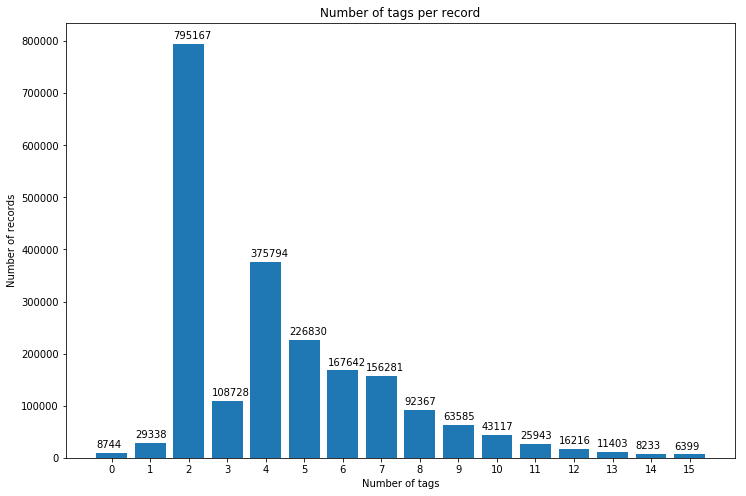

In [14]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

freq, counts = np.unique(np.array(tags_per_record), return_counts = True)
num_ticks = 16

plt.figure(figsize=(12,8))
plt.title('Number of tags per record')
plt.xlabel('Number of tags')
plt.ylabel('Number of records')

plt.bar(range(num_ticks), counts[:num_ticks])
plt.xticks(range(num_ticks), freq[:num_ticks])

for i, v in enumerate(counts[:num_ticks]):
    plt.text(range(num_ticks)[i] - 0.4, v + 10000, str(v))

plt.show()

## <a id='no-tags'>NO TAGS</a>

In [17]:
import pandas as pd
df = pd.DataFrame(sorted(records_with_no_tags_per_source.items(), key = lambda kv : kv[1], reverse = True), \
                  columns = ['Source', 'Records'])

df

,Source,Records
0,-Total Records-,8744
1,CrossRef,7248
2,bioRxiv,5584
3,OSF,1057
4,AgEcon Search,522
5,INA-Rxiv,468
6,PsyArXiv,452
7,SocArXiv,264
8,MarXiv,116
9,LawArXiv,66
